In [2]:
import torch
import torchvision
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
transform = transforms.Compose([transforms.ToTensor()])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

classes = tuple(str(i) for i in range(10))

In [4]:
trainloader.dataset.train_data[0]

C:\Users\artem\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\datasets\mnist.py:76: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

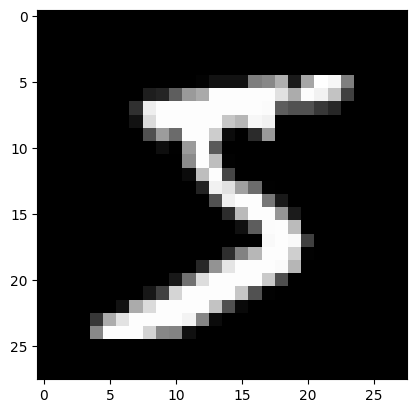

In [5]:
numpy_img = trainloader.dataset.train_data[0].numpy()
numpy_img.shape
plt.imshow(numpy_img, cmap='gray');

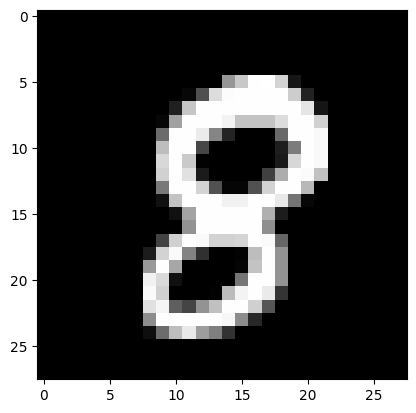

In [6]:
plt.imshow(trainloader.dataset.train_data[np.random.randint(low=0, high=60000)].numpy(), cmap='gray');

In [7]:
for data in trainloader:
    print(len(data))
    print('Images:',data[0].shape)
    print('Labels:', data[1].shape)
    break

2
Images: torch.Size([4, 1, 28, 28])
Labels: torch.Size([4])


In [9]:
import torch.nn as nn
import torch.nn.functional as F

In [10]:
class SimpleConvNet(nn.Module):
    def __init__(self):
        super(SimpleConvNet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        self.fc1 = nn.Linear(4 * 4 * 16, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 4 * 4 * 16)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [11]:
from tqdm import tqdm_notebook

net = SimpleConvNet()

loss_fn = torch.nn.CrossEntropyLoss()
learning_rate = 1e-4
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

for epoch in tqdm_notebook(range(3)):
    running_loss = 0.0
    for i, batch in enumerate(tqdm_notebook(trainloader)):
        X_batch, y_batch = batch
        optimizer.zero_grad()
        y_pred = net(X_batch)
        loss = loss_fn(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
print('Training ended')

C:\Users\artem\AppData\Local\Temp\ipykernel_7872\1679399067.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(3)):


  0%|          | 0/3 [00:00<?, ?it/s]

C:\Users\artem\AppData\Local\Temp\ipykernel_7872\1679399067.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i, batch in enumerate(tqdm_notebook(trainloader)):


  0%|          | 0/15000 [00:00<?, ?it/s]

[1,  2000] loss: 1.040
[1,  4000] loss: 0.412
[1,  6000] loss: 0.312
[1,  8000] loss: 0.265
[1, 10000] loss: 0.225
[1, 12000] loss: 0.205
[1, 14000] loss: 0.193


  0%|          | 0/15000 [00:00<?, ?it/s]

[2,  2000] loss: 0.163
[2,  4000] loss: 0.131
[2,  6000] loss: 0.127
[2,  8000] loss: 0.109
[2, 10000] loss: 0.118
[2, 12000] loss: 0.096
[2, 14000] loss: 0.116


  0%|          | 0/15000 [00:00<?, ?it/s]

[3,  2000] loss: 0.082
[3,  4000] loss: 0.100
[3,  6000] loss: 0.084
[3,  8000] loss: 0.083
[3, 10000] loss: 0.079
[3, 12000] loss: 0.087
[3, 14000] loss: 0.087
Training ended


In [52]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad():
    for data in testloader:
        images, labels = data
        y_pred = net(images)
        _, predicted = torch.max(y_pred, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
    
for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of     0 : 97 %
Accuracy of     1 : 98 %
Accuracy of     2 : 97 %
Accuracy of     3 : 98 %
Accuracy of     4 : 99 %
Accuracy of     5 : 98 %
Accuracy of     6 : 98 %
Accuracy of     7 : 98 %
Accuracy of     8 : 97 %
Accuracy of     9 : 97 %


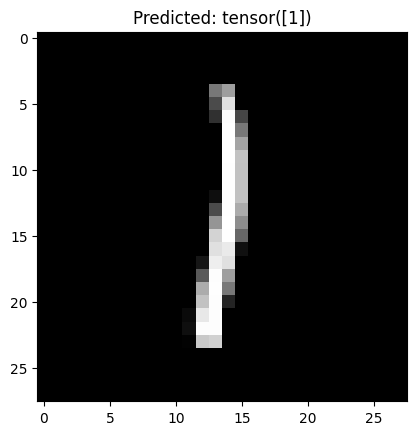

In [13]:
i = np.random.randint(low=0, high=10000)

def visualize_result(index):
    image = testloader.dataset.test_data[index].numpy()
    plt.imshow(image, cmap='gray')
    y_pred = net(torch.Tensor(image).view(1, 1, 28, 28))
    _, predicted = torch.max(y_pred, 1)
    plt.title(f'Predicted: {predicted}')
    
visualize_result(i)

In [15]:
import torch
import torchvision
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


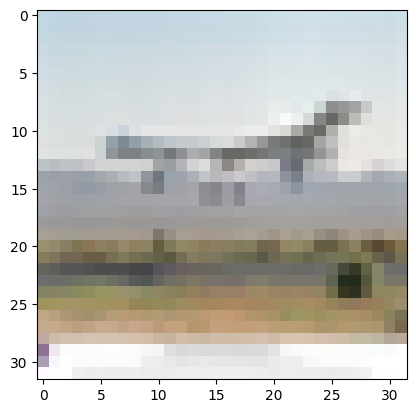

In [17]:
i = np.random.randint(low=0, high=50000)
plt.imshow(trainloader.dataset.data[i]);

In [19]:
import torch.nn as nn
import torch.nn.functional as F

In [20]:
class SimpleConvNet(torch.nn.Module):
    def __init__(self):
        super(SimpleConvNet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        self.fc1 = nn.Linear(5 * 5 * 16, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 5 * 5 * 16)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [27]:
from tqdm import tqdm_notebook

net = SimpleConvNet()

loss_fn = torch.nn.CrossEntropyLoss()
learning_rate = 1e-4
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

for epoch in tqdm_notebook(range(3)):
    running_loss = 0.0
    for i, batch in enumerate(tqdm_notebook(trainloader)):
        X_batch, y_batch = batch
        optimizer.zero_grad()
        y_pred = net(X_batch)
        loss = loss_fn(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
            
print('Training ended')

C:\Users\artem\AppData\Local\Temp\ipykernel_7872\2802210254.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(3)):


  0%|          | 0/3 [00:00<?, ?it/s]

C:\Users\artem\AppData\Local\Temp\ipykernel_7872\2802210254.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i, batch in enumerate(tqdm_notebook(trainloader)):


  0%|          | 0/12500 [00:00<?, ?it/s]

[1,  2000] loss: 2.035
[1,  4000] loss: 1.849
[1,  6000] loss: 1.702
[1,  8000] loss: 1.643
[1, 10000] loss: 1.607
[1, 12000] loss: 1.572


  0%|          | 0/12500 [00:00<?, ?it/s]

[2,  2000] loss: 1.513
[2,  4000] loss: 1.499
[2,  6000] loss: 1.472
[2,  8000] loss: 1.480
[2, 10000] loss: 1.449
[2, 12000] loss: 1.443


  0%|          | 0/12500 [00:00<?, ?it/s]

[3,  2000] loss: 1.427
[3,  4000] loss: 1.395
[3,  6000] loss: 1.379
[3,  8000] loss: 1.397
[3, 10000] loss: 1.359
[3, 12000] loss: 1.340
Training ended


In [28]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad():
    for data in testloader:
        images, labels = data
        y_pred = net(images)
        _, predicted = torch.max(y_pred, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
    
for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 55 %
Accuracy of   car : 64 %
Accuracy of  bird : 40 %
Accuracy of   cat : 38 %
Accuracy of  deer : 28 %
Accuracy of   dog : 38 %
Accuracy of  frog : 77 %
Accuracy of horse : 54 %
Accuracy of  ship : 66 %
Accuracy of truck : 55 %


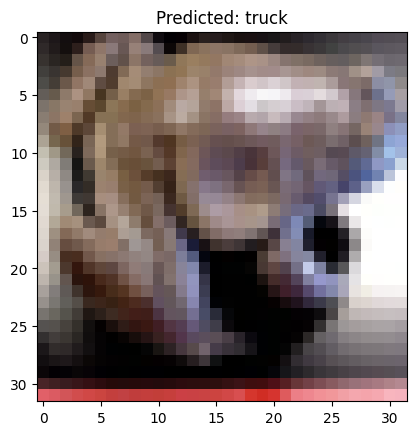

In [32]:
i = np.random.randint(low=0, high=10000)

def visualize_result(index):
    image = testloader.dataset.data[index]
    plt.imshow(image)
    image = transform(image) 
    y_pred = net(image.view(1, 3, 32, 32))
    _, predicted = torch.max(y_pred, 1)
    plt.title(f'Predicted: {classes[predicted.numpy()[0]]}')
    
visualize_result(i)

In [33]:
class BetterConvNet(nn.Module):
    def __init__(self):
        super(BetterConvNet, self).__init__()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        self.conv3 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5)
        self.fc1 = nn.Linear(3 * 3 * 32, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(self.conv3(F.relu(self.conv2(x))))
        x = x.view(-1, 3 * 3 * 32)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [34]:
from tqdm import tqdm_notebook

net = BetterConvNet()

loss_fn = torch.nn.CrossEntropyLoss()
learning_rate = 1e-4
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

for epoch in tqdm_notebook(range(5)):
    running_loss = 0.0
    for i, batch in enumerate(tqdm_notebook(trainloader)):
        X_batch, y_batch = batch
        optimizer.zero_grad()
        y_pred = net(X_batch)
        loss = loss_fn(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
            
print('Training ended')

C:\Users\artem\AppData\Local\Temp\ipykernel_7872\3492281718.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(5)):


  0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\artem\AppData\Local\Temp\ipykernel_7872\3492281718.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i, batch in enumerate(tqdm_notebook(trainloader)):


  0%|          | 0/12500 [00:00<?, ?it/s]

[1,  2000] loss: 2.102
[1,  4000] loss: 1.910
[1,  6000] loss: 1.824
[1,  8000] loss: 1.747
[1, 10000] loss: 1.686
[1, 12000] loss: 1.665


  0%|          | 0/12500 [00:00<?, ?it/s]

[2,  2000] loss: 1.603
[2,  4000] loss: 1.586
[2,  6000] loss: 1.541
[2,  8000] loss: 1.527
[2, 10000] loss: 1.521
[2, 12000] loss: 1.506


  0%|          | 0/12500 [00:00<?, ?it/s]

[3,  2000] loss: 1.452
[3,  4000] loss: 1.440
[3,  6000] loss: 1.429
[3,  8000] loss: 1.419
[3, 10000] loss: 1.381
[3, 12000] loss: 1.364


  0%|          | 0/12500 [00:00<?, ?it/s]

[4,  2000] loss: 1.329
[4,  4000] loss: 1.313
[4,  6000] loss: 1.320
[4,  8000] loss: 1.306
[4, 10000] loss: 1.320
[4, 12000] loss: 1.307


  0%|          | 0/12500 [00:00<?, ?it/s]

[5,  2000] loss: 1.275
[5,  4000] loss: 1.263
[5,  6000] loss: 1.250
[5,  8000] loss: 1.214
[5, 10000] loss: 1.232
[5, 12000] loss: 1.232
Training ended


In [35]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad():
    for data in testloader:
        images, labels = data
        y_pred = net(images)
        _, predicted = torch.max(y_pred, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
    
for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 50 %
Accuracy of   car : 73 %
Accuracy of  bird : 38 %
Accuracy of   cat : 37 %
Accuracy of  deer : 39 %
Accuracy of   dog : 53 %
Accuracy of  frog : 68 %
Accuracy of horse : 58 %
Accuracy of  ship : 74 %
Accuracy of truck : 57 %


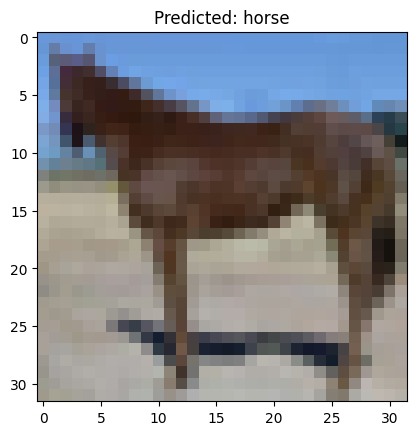

In [51]:
i = np.random.randint(low=0, high=10000)

def visualize_result(index):
    image = testloader.dataset.data[index]
    plt.imshow(image)
    image = transform(image) 
    y_pred = net(image.view(1, 3, 32, 32))
    _, predicted = torch.max(y_pred, 1)
    plt.title(f'Predicted: {classes[predicted.numpy()[0]]}')
    
visualize_result(i)

In [53]:
class StrongConvNet(nn.Module):
    def __init__(self):
        super(StrongConvNet, self).__init__()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout = nn.Dropout(p=0.2)
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=8, kernel_size=5)
        self.bn1 = nn.BatchNorm2d(8)
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=1)
        self.bn2 = nn.BatchNorm2d(16)
        self.conv3 = nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3)
        self.bn3 = nn.BatchNorm2d(16)
        self.conv4 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=1)
        self.bn4 = nn.BatchNorm2d(32)
        self.conv5 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3)
        self.bn5 = nn.BatchNorm2d(32)
        self.fc1 = nn.Linear(4 * 4 * 32, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.bn1(F.relu(self.conv1(x)))
        x = self.pool(x)
        x = self.bn2(F.relu(self.conv2(x)))
        x = self.bn3(F.relu(self.conv3(x)))
        x = self.pool(x)
        x = self.bn4(F.relu(self.conv4(x)))
        x = self.bn5(F.relu(self.conv5(x)))
        x = x.view(-1, 4 * 4 * 32)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

In [54]:
from tqdm import tqdm_notebook
from torch.optim import lr_scheduler

net = StrongConvNet()

loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
learning_rate = 1e-3
num_epochs = 5
scheduler = lr_scheduler.CosineAnnealingLR(optimizer, T_max=num_epochs)

for epoch in tqdm_notebook(range(num_epochs)):
    scheduler.step()
    running_loss = 0.0
    for i, batch in enumerate(tqdm_notebook(trainloader)):
        X_batch, y_batch = batch
        optimizer.zero_grad()
        y_pred = net(X_batch)
        loss = loss_fn(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
        running_loss = 0.0
        
print('Training ended')

C:\Users\artem\AppData\Local\Temp\ipykernel_7872\1053088415.py:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(num_epochs)):


  0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\artem\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\optim\lr_scheduler.py:224: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn(
C:\Users\artem\AppData\Local\Temp\ipykernel_7872\1053088415.py:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i, batch in enumerate(tqdm_notebook(trainloader)):


  0%|          | 0/12500 [00:00<?, ?it/s]

[1,  2000] loss: 0.001
[1,  4000] loss: 0.001
[1,  6000] loss: 0.001
[1,  8000] loss: 0.001
[1, 10000] loss: 0.001
[1, 12000] loss: 0.001


  0%|          | 0/12500 [00:00<?, ?it/s]

[2,  2000] loss: 0.000
[2,  4000] loss: 0.001
[2,  6000] loss: 0.001
[2,  8000] loss: 0.000
[2, 10000] loss: 0.001
[2, 12000] loss: 0.001


  0%|          | 0/12500 [00:00<?, ?it/s]

[3,  2000] loss: 0.001
[3,  4000] loss: 0.001
[3,  6000] loss: 0.000
[3,  8000] loss: 0.001
[3, 10000] loss: 0.001
[3, 12000] loss: 0.001


  0%|          | 0/12500 [00:00<?, ?it/s]

[4,  2000] loss: 0.001
[4,  4000] loss: 0.001
[4,  6000] loss: 0.000
[4,  8000] loss: 0.001
[4, 10000] loss: 0.000
[4, 12000] loss: 0.001


  0%|          | 0/12500 [00:00<?, ?it/s]

[5,  2000] loss: 0.000
[5,  4000] loss: 0.000
[5,  6000] loss: 0.000
[5,  8000] loss: 0.001
[5, 10000] loss: 0.000
[5, 12000] loss: 0.001
Training ended


In [55]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad():
    for data in testloader:
        images, labels = data
        y_pred = net(images)
        _, predicted = torch.max(y_pred, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
    
for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 61 %
Accuracy of   car : 65 %
Accuracy of  bird : 36 %
Accuracy of   cat : 29 %
Accuracy of  deer : 43 %
Accuracy of   dog : 43 %
Accuracy of  frog : 62 %
Accuracy of horse : 60 %
Accuracy of  ship : 64 %
Accuracy of truck : 61 %


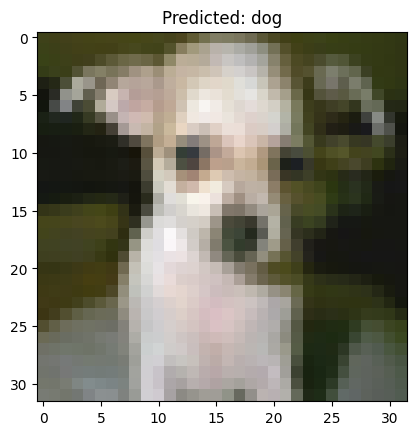

In [71]:
i = np.random.randint(low=0, high=10000)

def visualize_result(index):
    image = testloader.dataset.data[index]
    plt.imshow(image)
    image = transform(image) 
    y_pred = net(image.view(1, 3, 32, 32))
    _, predicted = torch.max(y_pred, 1)
    plt.title(f'Predicted: {classes[predicted.numpy()[0]]}')
    
visualize_result(i)

In [110]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision

In [121]:
transform = transforms.ToTensor()

trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

In [122]:
trainloader.dataset.train_data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
           0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,   1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,
          36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,   0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,
         102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

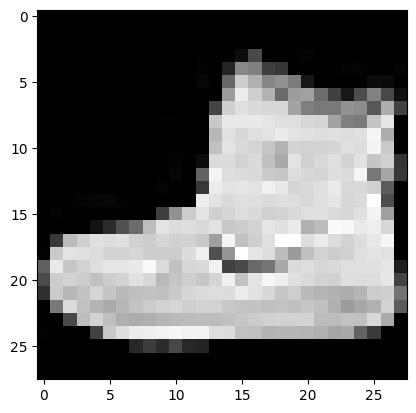

In [123]:
numpy_img = trainloader.dataset.train_data[0].numpy()
numpy_img.shape
plt.imshow(numpy_img, cmap='gray');

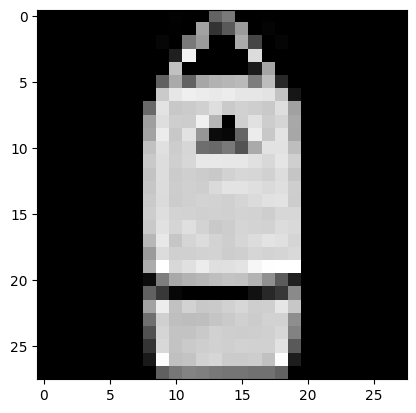

In [124]:
plt.imshow(trainloader.dataset.train_data[np.random.randint(low=0, high=60000)].numpy(), cmap='gray');

In [125]:
for data in trainloader:
    print(len(data))
    print('Images:',data[0].shape)
    print('Labels:', data[1].shape)
    break

2
Images: torch.Size([4, 1, 28, 28])
Labels: torch.Size([4])


In [126]:
for data in testloader:
    print(len(data))
    print('Images:',data[0].shape)
    print('Labels:', data[1].shape)
    break

2
Images: torch.Size([4, 1, 28, 28])
Labels: torch.Size([4])


In [127]:
import torch.nn as nn
import torch.nn.functional as F

In [128]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [164]:
from tqdm import tqdm_notebook

MLP_net = MLP()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
MLP_net.to(device)

loss_fn = torch.nn.CrossEntropyLoss()
learning_rate = 1e-3
optimizer = torch.optim.Adam(MLP_net.parameters(), lr=learning_rate)

MLP_train_losses = []

for epoch in tqdm_notebook(range(5)):
    running_loss = 0.0
    for i, batch in enumerate(tqdm_notebook(trainloader)):
        X_batch, y_batch = batch
        optimizer.zero_grad()
        y_pred = MLP_net(X_batch)
        loss = loss_fn(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 3000 == 2999:
            MLP_train_losses.append(running_loss / 3000)
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 3000))
            running_loss = 0.0
        
print('Training ended')

C:\Users\artem\AppData\Local\Temp\ipykernel_7872\2865946918.py:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(5)):


  0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\artem\AppData\Local\Temp\ipykernel_7872\2865946918.py:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i, batch in enumerate(tqdm_notebook(trainloader)):


  0%|          | 0/15000 [00:00<?, ?it/s]

[1,  3000] loss: 0.689
[1,  6000] loss: 0.514
[1,  9000] loss: 0.472
[1, 12000] loss: 0.427
[1, 15000] loss: 0.419


  0%|          | 0/15000 [00:00<?, ?it/s]

[2,  3000] loss: 0.392
[2,  6000] loss: 0.389
[2,  9000] loss: 0.391
[2, 12000] loss: 0.383
[2, 15000] loss: 0.379


  0%|          | 0/15000 [00:00<?, ?it/s]

[3,  3000] loss: 0.358
[3,  6000] loss: 0.351
[3,  9000] loss: 0.358
[3, 12000] loss: 0.363
[3, 15000] loss: 0.352


  0%|          | 0/15000 [00:00<?, ?it/s]

[4,  3000] loss: 0.338
[4,  6000] loss: 0.335
[4,  9000] loss: 0.339
[4, 12000] loss: 0.351
[4, 15000] loss: 0.338


  0%|          | 0/15000 [00:00<?, ?it/s]

[5,  3000] loss: 0.311
[5,  6000] loss: 0.325
[5,  9000] loss: 0.333
[5, 12000] loss: 0.326
[5, 15000] loss: 0.327
Training ended


In [165]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

MLP_test_accuracies = []

with torch.no_grad():
    for data in testloader:
        images, labels = data
        y_pred = MLP_net(images)
        _, predicted = torch.max(y_pred, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
    
for i in range(10):
    MLP_test_accuracies.append(100 * class_correct[i] / class_total[i])
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of T-shirt/top : 80 %
Accuracy of Trouser : 97 %
Accuracy of Pullover : 72 %
Accuracy of Dress : 78 %
Accuracy of  Coat : 92 %
Accuracy of Sandal : 97 %
Accuracy of Shirt : 38 %
Accuracy of Sneaker : 94 %
Accuracy of   Bag : 97 %
Accuracy of Ankle boot : 94 %


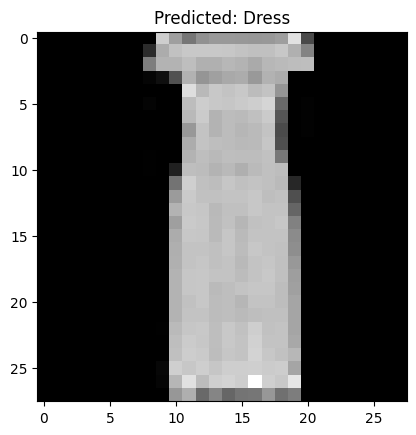

In [157]:
i = np.random.randint(low=0, high=len(testset))

def visualize_result(index):
    image, label = testloader.dataset[index]
    plt.imshow(image.squeeze(), cmap='gray')
    image = image.unsqueeze(0).to(device)
    with torch.no_grad():
        y_pred = MLP_net(image)
        _, predicted = torch.max(y_pred, 1)
    plt.title(f'Predicted: {classes[predicted.item()]}')
    plt.show()

visualize_result(i)

In [158]:
import torch.nn as nn
import torch.nn.functional as F

In [159]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 3 * 3, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))
        x = x.view(-1, 64 * 3 * 3)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [167]:
from tqdm import tqdm_notebook

CNN_net = CNN()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
CNN_net.to(device)

loss_fn = torch.nn.CrossEntropyLoss()
learning_rate = 1e-3
optimizer = torch.optim.Adam(CNN_net.parameters(), lr=learning_rate)

CNN_train_losses = []

for epoch in tqdm_notebook(range(5)):
    running_loss = 0.0
    for i, batch in enumerate(tqdm_notebook(trainloader)):
        X_batch, y_batch = batch
        optimizer.zero_grad()
        y_pred = CNN_net(X_batch)
        loss = loss_fn(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 3000 == 2999:
            CNN_train_losses.append(running_loss / 3000)
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 3000))
            running_loss = 0.0
print('Training ended')

C:\Users\artem\AppData\Local\Temp\ipykernel_7872\4080298256.py:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(5)):


  0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\artem\AppData\Local\Temp\ipykernel_7872\4080298256.py:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i, batch in enumerate(tqdm_notebook(trainloader)):


  0%|          | 0/15000 [00:00<?, ?it/s]

[1,  3000] loss: 0.673
[1,  6000] loss: 0.441
[1,  9000] loss: 0.363
[1, 12000] loss: 0.355
[1, 15000] loss: 0.325


  0%|          | 0/15000 [00:00<?, ?it/s]

[2,  3000] loss: 0.300
[2,  6000] loss: 0.296
[2,  9000] loss: 0.292
[2, 12000] loss: 0.283
[2, 15000] loss: 0.270


  0%|          | 0/15000 [00:00<?, ?it/s]

[3,  3000] loss: 0.249
[3,  6000] loss: 0.254
[3,  9000] loss: 0.251
[3, 12000] loss: 0.250
[3, 15000] loss: 0.249


  0%|          | 0/15000 [00:00<?, ?it/s]

[4,  3000] loss: 0.226
[4,  6000] loss: 0.228
[4,  9000] loss: 0.238
[4, 12000] loss: 0.231
[4, 15000] loss: 0.238


  0%|          | 0/15000 [00:00<?, ?it/s]

[5,  3000] loss: 0.209
[5,  6000] loss: 0.201
[5,  9000] loss: 0.229
[5, 12000] loss: 0.223
[5, 15000] loss: 0.216
Training ended


In [168]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

CNN_test_accuracies = []

with torch.no_grad():
    for data in testloader:
        images, labels = data
        y_pred = CNN_net(images)
        _, predicted = torch.max(y_pred, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
    
for i in range(10):
    CNN_test_accuracies.append(100 * class_correct[i] / class_total[i])
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of T-shirt/top : 85 %
Accuracy of Trouser : 98 %
Accuracy of Pullover : 83 %
Accuracy of Dress : 88 %
Accuracy of  Coat : 89 %
Accuracy of Sandal : 99 %
Accuracy of Shirt : 71 %
Accuracy of Sneaker : 95 %
Accuracy of   Bag : 98 %
Accuracy of Ankle boot : 95 %


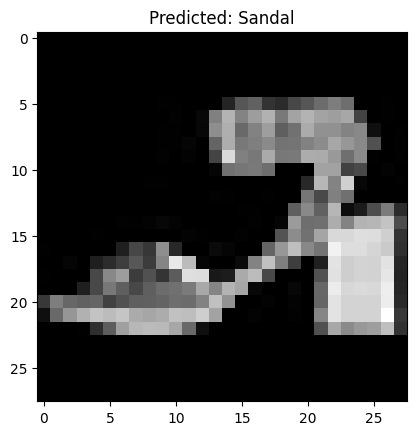

In [162]:
i = np.random.randint(low=0, high=len(testset))

def visualize_result(index):
    image, label = testloader.dataset[index]
    plt.imshow(image.squeeze(), cmap='gray')
    image = image.unsqueeze(0).to(device)
    with torch.no_grad():
        y_pred = CNN_net(image)
        _, predicted = torch.max(y_pred, 1)
    plt.title(f'Predicted: {classes[predicted.item()]}')
    plt.show()

visualize_result(i)

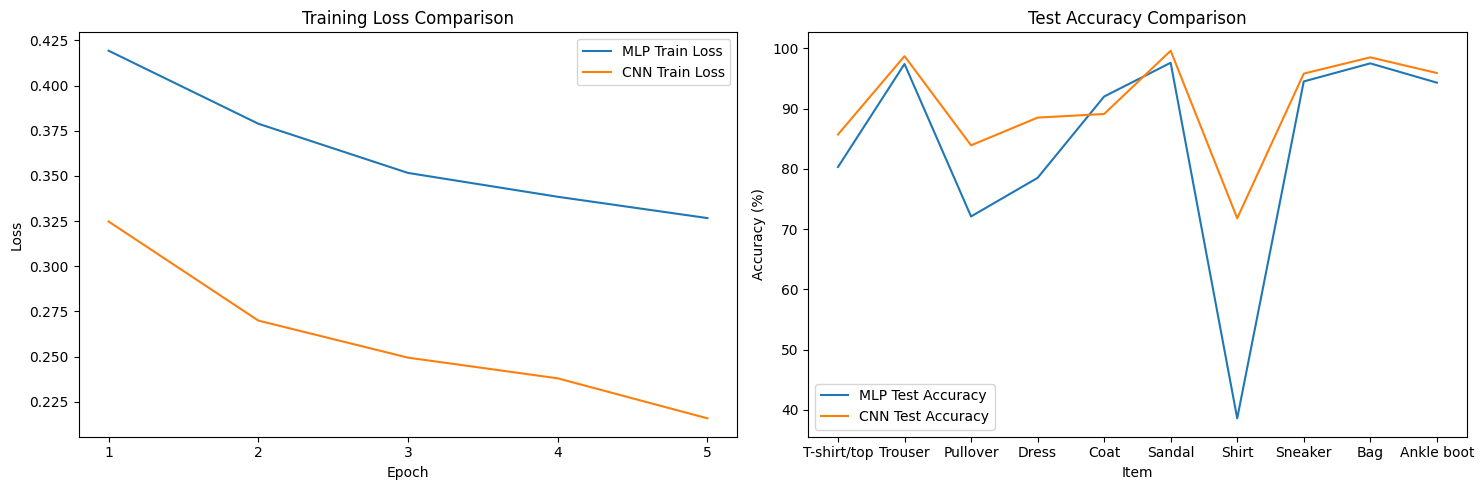

In [178]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(x_values, MLP_train_losses[4::5], label="MLP Train Loss")
plt.plot(x_values, CNN_train_losses[4::5], label="CNN Train Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.xticks([i for i in range(5, 26, 5)], range(1, 6))
plt.legend()
plt.title("Training Loss Comparison")

plt.subplot(1, 2, 2)
plt.plot(MLP_test_accuracies, label="MLP Test Accuracy")
plt.plot(CNN_test_accuracies, label="CNN Test Accuracy")
plt.xticks(ticks=range(10), labels=classes)
plt.xlabel("Item")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.title("Test Accuracy Comparison")

plt.tight_layout()
plt.show()